### Code for viewing frequency densities of different resolutions/folders

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


In [6]:
datapath = "/media/baran/DATA/datasets/DIV2K/dataset_train_128/"

Test in train/validation set

Text(0.5, 1.0, 'Frequency Density Response')

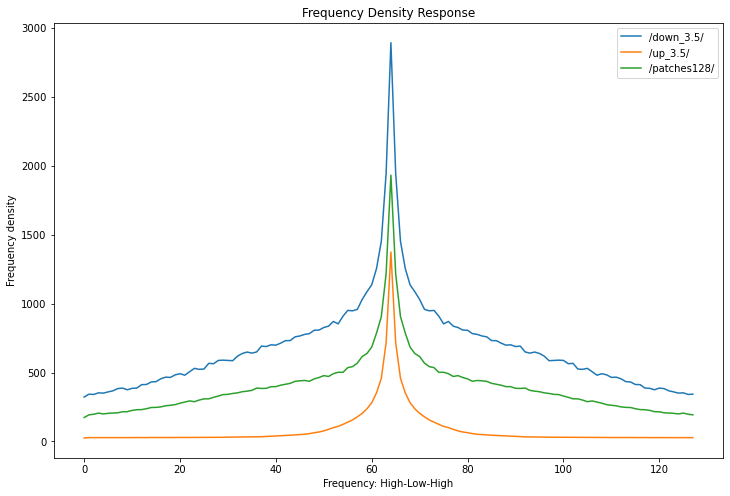

In [7]:
plt.rcParams['figure.figsize'] = [12, 8]
scale = "3.5"

densities_list = []
densities_list.append([])
densities_list.append([])
densities_list.append([])

folders_list  = []
folders_list.append(f"/down_{scale}/")
folders_list.append(f"/up_{scale}/")
folders_list.append("/patches128/")

# For every ground truth image
for idx in os.listdir(datapath):
    idx_path = datapath + idx
    
    for i, folder in enumerate(folders_list):
        for image_name in os.listdir(idx_path + folder):
            img = Image.open(idx_path + folder + image_name).convert('L')
            img_np = np.asarray(img)
            # Convert to Fourier domain
            # ifftshift shifts (0,0) to the center of the image. See the appendix of:
            # https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/
            ft = np.fft.ifftshift(img_np)
            ft = np.fft.fft2(ft)
            ft = np.fft.fftshift(ft)
            densities_list[i].append(abs(ft[:, 0]))

for i, densities in enumerate(densities_list):
    plt.plot(sum(densities) / len(densities), label=folders_list[i])
    
plt.xlabel("Frequency: High-Low-High")
plt.ylabel("Frequency density")
plt.legend()
plt.title("Frequency Density Response")


Test on other sets

In [ ]:
datapaths = []
datapaths.append["/downsampled_folder"]
datapaths.append["/upsampled_folder"]
datapaths.append["/original_folder"]

labels = ["label_down", "label_up", "label_orig"]

In [ ]:


plt.rcParams['figure.figsize'] = [12, 8]

for i, path in enumerate(datapaths):
    densities = []
    for idx, image_name in enumerate(sorted(os.listdir(path))):
        # Read image and convert to grayscale
        img = Image.open(path + "/" + image_name).convert('L')
        img_np = np.asarray(img)
        # Convert to Fourier domain
        # ifftshift shifts (0,0) to the center of the image. See the appendix of:
        # https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/
        ft = np.fft.ifftshift(img_np)
        ft = np.fft.fft2(ft)
        ft = np.fft.fftshift(ft)
        densities.append(abs(ft[:, 0]))
        # 800 samples are enough for generalizing
        if(idx == 800):
            break
    plt.plot(sum(densities) / len(densities), label=labels[i])

plt.xlabel("Frequency: High-Low-High")
plt.ylabel("Frequency density")
plt.legend()
plt.title("Frequency Density Response")
